In [1]:
import sys
sys.path.append('../')
import env

In [2]:
import pandas as pd
import numpy as np

In [3]:
READ_FILE = 'Timeflow'

In [4]:
timeflow_array = {}
def main(args, array):
    df = pd.read_csv(env.get_full_path(READ_FILE, args), index_col=0)
    array[args.dir][args.ratio][args.seed][args.csv] = df.copy()
    
env.for_default_init(main, timeflow_array)

In [9]:
people='p10000'
ratio='r4'
seed='s123'
csv='mobile'
area=env.contour_to_area(540)

In [12]:
df = timeflow_array[people][ratio][seed][csv].copy()
stack_data = df.iloc[area,:].values.reshape(1,-1)
stack_data

array([[ 77., 149., 205., 200., 175., 149.]])

Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster


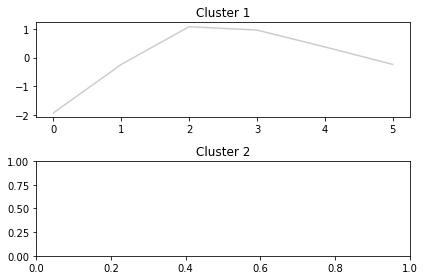

In [20]:
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
%matplotlib inline

seed = 0
np.random.seed(seed)
#相互相関を計算するために、正規化する必要があります。
#TimeSeriesScalerMeanVarianceがデータを正規化してくれるクラスになります。
stack_data = TimeSeriesScalerMeanVariance(mu=0.0, std=1.0).fit_transform(stack_data)

#KShapeクラスのインスタンス化
ks = KShape(n_clusters=2, n_init=10, verbose=True, random_state=seed)
y_pred = ks.fit_predict(stack_data)

#クラスタリングして可視化
plt.figure()
for yi in range(2):
    plt.subplot(2, 1, 1 + yi)
    for xx in stack_data[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    #plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

Init 1
0.220 --> 0.254 --> 
Init 2
0.220 --> 0.254 --> 
Init 3
0.220 --> 0.254 --> 
Init 4
0.220 --> 0.254 --> 
Init 5
0.220 --> 0.254 --> 
Init 6
0.220 --> 0.254 --> 
Init 7
0.220 --> 0.254 --> 
Init 8
0.220 --> 0.254 --> 
Init 9
0.220 --> 0.254 --> 
Init 10
0.220 --> 0.254 --> 
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster

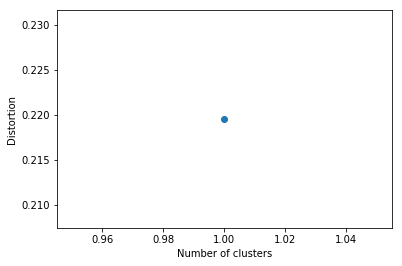

In [21]:
distortions = []

#1~10クラスタまで計算 
for i  in range(1,11):
    ks = KShape(n_clusters=i, n_init=10, verbose=True, random_state=seed)
    #クラスタリングの計算を実行
    ks.fit(stack_data)
    #ks.fitするとks.inertia_が得られる
    distortions.append(ks.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()